In [54]:
import pandas as pd

target_file_path = "/content/drive/MyDrive/machine_learning_challenge/ML-challenge/EX_challenging_problems/01_guessing_titanic_survivors/titanic.csv"
features = pd.read_csv(target_file_path, index_col = 0)

# Preprocessing for missing values

processed_csv  = features

processed_csv["Age"] = features["Age"].fillna(features["Age"].mean())
processed_csv["Sex"] = features["Sex"].map({'male' : 0, 'female' : 1})
processed_csv.drop(["Ticket", "Embarked"], axis = 1, inplace=True)

# # Let's use "Cabin" feature, too! 
processed_csv["Cabin"] = processed_csv["Cabin"].fillna("X").apply(lambda x : x[0])
processed_csv["Cabin"] = processed_csv["Cabin"].replace({'G' : 'X', 'T' : 'X'}).replace({'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'X' : 7})

# name to score?
# arbitrarily scored according to the appellation, assisted by Google Bard AI.
appellation_score = {
    "Lady": 240,
    "theCountess": 200,
    "Mme": 180,
    "Ms": 170,
    "Mrs": 165,
    "Miss": 130,
    "Don": 80,
    "Rev": 65,
    "Dr": 60,
    "Major": 55,
    "Sir": 50,
    "Col": 45,
    "Mr" : 45,
    "Capt": 40,
    "Master": 35,
    "Mlle": 30,
    "Jonkheer": 25
}

def name_to_priority_assumption(name):
  appellation = name.split(",")[1].split(".")[0].replace(" ", "")
  return appellation_score[appellation]

# Redefine
processed_csv["Name"] = processed_csv["Name"].apply(lambda x : name_to_priority_assumption(x))

print(processed_csv)

             Survived  Pclass  Name  Sex        Age  SibSp  Parch     Fare  \
PassengerId                                                                  
1                   0       3    45    0  22.000000      1      0   7.2500   
2                   1       1   165    1  38.000000      1      0  71.2833   
3                   1       3   130    1  26.000000      0      0   7.9250   
4                   1       1   165    1  35.000000      1      0  53.1000   
5                   0       3    45    0  35.000000      0      0   8.0500   
...               ...     ...   ...  ...        ...    ...    ...      ...   
887                 0       2    65    0  27.000000      0      0  13.0000   
888                 1       1   130    1  19.000000      0      0  30.0000   
889                 0       3   130    1  29.699118      1      2  23.4500   
890                 1       1    45    0  26.000000      0      0  30.0000   
891                 0       3    45    0  32.000000      0      

In [55]:
# ready for data

passenger_data_input  = processed_csv[["Pclass", "Name", "Cabin", "Sex", "Age", "SibSp", "Parch", "Fare"]].to_numpy()
passenger_data_target = processed_csv[["Survived"]].to_numpy()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def run_experiment():
  train_input, test_input, train_target, test_target = train_test_split(passenger_data_input, passenger_data_target)

  # standardization preprocessing (from sklearn.preprocessing import StandardScaler)

  ss = StandardScaler()
  ss.fit(train_input)

  train_scaled = ss.transform(train_input)
  test_scaled  = ss.transform(test_input)

  # Train the model with logistic regression (from sklearn.linear_model import LogisticRegression)

  lr = LogisticRegression(max_iter = 10000)
  lr.fit(train_input, train_target.ravel())

  # print("=======lr.predict(test_input)=======")
  # print(lr.predict(test_input))

  # print("=======test_target======")
  # test_target_list = [_element[0] for _element in test_target.tolist()]

  # _hit = 0;
  # for _element in test_target_list:
  #   print(_element, end=' ')
  #   _hit += 1
  #   if _hit % 37 == 0:
  #     print()

  # print("\n\n\n")
  train_accuracy = lr.score(train_input, train_target)
  test_accuracy  = lr.score(test_input, test_target)
  # print(f"Model accuracy(train) : {train_accuracy}")
  # print(f"Model accuracy(test) : {test_accuracy}")

  return train_accuracy

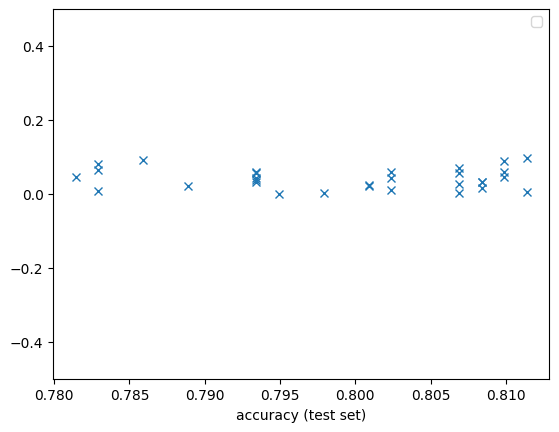

max accuracy : 0.811377245508982
min accuracy : 0.781437125748503
avg accuracy : 0.7993013972055888


In [56]:
# get an average accuracy for multiple experiments
import matplotlib.pyplot as plt
import numpy as np
import random

accuracy_list = []

trial = 30
for _seq in range(trial):
  accuracy_list.append(run_experiment())

y_dummy_list = [random.random()/10 for _rand in range(trial)]
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.plot(accuracy_list, y_dummy_list, 'x')
plt.xlabel("accuracy (test set)")
plt.legend()
plt.show()      # we don't need to take care about Matplotlib artist warning. Just ignore.

# print(accuracy_list)
# plt.plot(accuracy_list, np.zeros_like(accuracy_list))
print(f"max accuracy : {max(accuracy_list)}")
print(f"min accuracy : {min(accuracy_list)}")
print(f"avg accuracy : {sum(accuracy_list) / len(accuracy_list)}")